<a href="https://colab.research.google.com/github/Fedor102/Cat-dogs-MobileNet/blob/main/Cat_Dogs_MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Установим размеры(константы) для изображений и для классов кошки собаки
IMG_WIDTH,IMG_HEIGHT,NUM_CLASSES = 150,150,2

In [ ]:
#Загружаем наши библиотеки
from keras.applications import MobileNet
from keras import models
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras import optimizers
from keras.layers import Input
from keras.models import Model

In [ ]:
#Создаем и возвращаем кастомную нейросетевую модель для классификации изображений на основе архитектуры MobileNet
def model_maker():
    base_model = MobileNet(include_top=False, input_shape = (IMG_WIDTH, IMG_HEIGHT, 3))

    for layer in base_model.layers[:]:
        layer.trainable = False

    input = Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    custom_model = base_model(input)
    custom_model = GlobalAveragePooling2D()(custom_model)
    custom_model = Dense(64, activation='relu')(custom_model)
    custom_model = Dropout(0.5)(custom_model)
    predictions = Dense(NUM_CLASSES, activation='softmax')(custom_model)

    return Model(inputs=input, outputs=predictions)

In [ ]:
model = model_maker()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 mobilenet_1.00_224 (Functi  (None, 4, 4, 1024)        3228864   
 onal)                                                           
                                                                 
 global_average_pooling2d_1  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 64)                65600     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 130 

In [ ]:
# Ваше решение
!wget https://storage.yandexcloud.net/academy.ai/cat-and-dog.zip

--2024-06-19 19:27:41--  https://storage.yandexcloud.net/academy.ai/cat-and-dog.zip
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228082266 (218M) [application/x-zip-compressed]
Saving to: ‘cat-and-dog.zip.1’

cat-and-dog.zip.1   100%[===================>] 217.52M  15.2MB/s    in 20s     

2024-06-19 19:28:03 (11.0 MB/s) - ‘cat-and-dog.zip.1’ saved [228082266/228082266]



In [ ]:
# Разархивируем датасета во временную папку 'temp'
!unzip -qo "cat-and-dog" -d ./temp

# Папка с папками картинок, рассортированных по категориям
IMAGE_PATH = './temp/training_set/training_set/'
IMAGE_PATH_TEST = './temp/test_set/test_set/'
# Папка в которой будем создавать выборки
BASE_DIR = './dataset/'

In [ ]:
import os
os.listdir(IMAGE_PATH)
os.listdir(IMAGE_PATH_TEST)

['dogs', 'cats']

In [ ]:
# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))
CLASS_LIST_TEST = sorted(os.listdir(IMAGE_PATH_TEST))
# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)
CLASS_COUNT_TEST = len(CLASS_LIST_TEST)
# Проверка результата
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')
print(f'Количество классов: {CLASS_COUNT_TEST}, метки классов: {CLASS_LIST_TEST}')

Количество классов: 2, метки классов: ['cats', 'dogs']
Количество классов: 2, метки классов: ['cats', 'dogs']


In [ ]:
data_files = []  # Cписок путей к файлам изображений
data_labels = [] # Список меток классов

for class_label in range(CLASS_COUNT):    # Перебор по всем классам по порядку номеров (их меток)
    class_name = CLASS_LIST[class_label]  # Выборка имени класса из списка имен
    class_path = IMAGE_PATH + class_name  # Полный путь к папке с изображениями класса

    # Получение списка имен файлов с изображениями текущего класса
    class_files = os.listdir(class_path)

    # Вывод информации о численности класса
    print(f'Размер класса {class_name} составляет {len(class_files)} животных')

    # Добавление к общему списку всех файлов класса с добавлением родительского пути
    data_files += [f'{class_path}/{file_name}' for file_name in class_files]

    # Добавление к общему списку меток текущего класса - их ровно столько, сколько файлов в классе
    data_labels += [class_label] * len(class_files)

print('Общий размер базы для обучения:', len(data_labels))

Размер класса cats составляет 4000 животных
Размер класса dogs составляет 4005 животных
Общий размер базы для обучения: 8005


In [ ]:
data_files = []  # Cписок путей к файлам изображений
data_labels = [] # Список меток классов

for class_label in range(CLASS_COUNT_TEST):    # Перебор по всем классам по порядку номеров (их меток)
    class_name = CLASS_LIST_TEST[class_label]  # Выборка имени класса из списка имен
    class_path = IMAGE_PATH_TEST + class_name  # Полный путь к папке с изображениями класса

    # Получение списка имен файлов с изображениями текущего класса
    class_files = os.listdir(class_path)

    # Вывод информации о численности класса
    print(f'Размер класса {class_name} для проверки составляет {len(class_files)} животных')

    # Добавление к общему списку всех файлов класса с добавлением родительского пути
    data_files += [f'{class_path}/{file_name}' for file_name in class_files]

    # Добавление к общему списку меток текущего класса - их ровно столько, сколько файлов в классе
    data_labels += [class_label] * len(class_files)

print('Общий размер базы для проверки:', len(data_labels))

Размер класса cats для проверки составляет 1011 животных
Размер класса dogs для проверки составляет 1012 животных
Общий размер базы для проверки: 2023


In [ ]:
# Набор утилит для работы с файловой системой
import shutil

# При повторном запуске пересоздаим структуру каталогов
# Если папка существует, то удаляем ее со всеми вложенными каталогами и файлами
if os.path.exists(BASE_DIR):
    shutil.rmtree(BASE_DIR)

# Создаем папку по пути BASE_DIR
os.mkdir(BASE_DIR)

# Сцепляем путь до папки с именем вложенной папки. Аналогично BASE_DIR + 'train'
train_dir = os.path.join(BASE_DIR, 'train')

# Создаем подпапку, используя путь
os.mkdir(train_dir)

# Сцепляем путь до папки с именем вложенной папки. Аналогично BASE_DIR + 'validation'
validation_dir = os.path.join(BASE_DIR, 'validation')

# Создаем подпапку, используя путь
os.mkdir(validation_dir)

# Сцепляем путь до папки с именем вложенной папки. Аналогично BASE_DIR + 'test'
test_dir = os.path.join(BASE_DIR, 'test')

# Создаем подпапку, используя путь
os.mkdir(test_dir)

In [ ]:
# Функция создания подвыборок (папок с файлами)
def create_dataset(
    img_path: str,         # Путь к файлам с изображениями классов
    new_path: str,         # Путь к папке с выборками
    class_name: str,       # Имя класса (оно же и имя папки)
    start_index: int,      # Стартовый индекс изображения, с которого начинаем подвыборку
    end_index: int         # Конечный индекс изображения, до которого создаем подвыборку

):

    src_path = os.path.join(img_path, class_name)  # Полный путь к папке с изображениями класса
    dst_path = os.path.join(new_path, class_name)  # Полный путь к папке с новым датасетом класса

    # Получение списка имен файлов с изображениями текущего класса
    class_files = os.listdir(src_path)

    # Создаем подпапку, используя путь
    os.mkdir(dst_path)

    # Перебираем элементы, отобранного списка с начального по конечный индекс
    for fname in class_files[start_index : end_index]:
        # Путь к файлу (источник)
        src = os.path.join(src_path, fname)
        # Новый путь расположения файла (назначение)
        dst = os.path.join(dst_path, fname)
        # Копируем файл из источника в новое место (назначение)
        shutil.copyfile(src, dst)

In [ ]:
for class_label in range(CLASS_COUNT):    # Перебор по всем классам по порядку номеров (их меток)
    class_name = CLASS_LIST[class_label]  # Выборка имени класса из списка имен

    # Создаем обучающую выборку для заданного класса из диапазона (0-3000)
    create_dataset(IMAGE_PATH, train_dir, class_name, 0, 3000)
    # Создаем проверочную выборку для заданного класса из диапазона (3000-4000)
    create_dataset(IMAGE_PATH, validation_dir, class_name, 3000, 4000)


In [ ]:
print('Число кошек %s, число собак %s в обучающей выборке' \
      % (
          len(os.listdir(os.path.join(train_dir, 'cats'))),
          len(os.listdir(os.path.join(train_dir, 'dogs')))
         )
      )

print('Число кошек %s, число собак %s в проверочной выборке' \
      % (
          len(os.listdir(os.path.join(validation_dir, 'cats'))),
          len(os.listdir(os.path.join(validation_dir, 'dogs')))
         )
      )

Число кошек 3000, число собак 3000 в обучающей выборке
Число кошек 1000, число собак 1000 в проверочной выборке


In [ ]:
for class_label in range(CLASS_COUNT_TEST):    # Перебор по всем классам по порядку номеров (их меток)
    class_name = CLASS_LIST_TEST[class_label]
    # Создаем тестовую выборку для заданного класса из диапазона (0-1000)
    create_dataset(IMAGE_PATH_TEST, test_dir, class_name, 0, 1000)

In [ ]:
print('Число кошек %s, число собак %s в контрольной выборке' \
      % (
          len(os.listdir(os.path.join(test_dir, 'cats'))),
          len(os.listdir(os.path.join(test_dir, 'dogs')))
         )
      )

Число кошек 1000, число собак 1000 в контрольной выборке


In [ ]:
from keras.preprocessing.image import ImageDataGenerator # Импортируем генератор изображений

# Создаем генераторы для  обучающей и тестовой выборок
# Предварительно нормализуем данные делением на 255, приводим интесивность пикселей картинки к диапазону от 0 до 1
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Генерируем мини-батчи для обучения из заданной директории
train_generator = train_datagen.flow_from_directory(
    train_dir, # Целевой каталог
    target_size=(150, 150), # Привести все изображения к размеру 150 × 150
    batch_size=20, # Размер батча (20 изображений)
    class_mode='binary'  # Делаем генерацию для задачи многоклассовой классификации
)

# Генерируем мини-батчи для проверки из заданной директории
validation_generator = test_datagen.flow_from_directory(
    validation_dir, # Целевой каталог
    target_size=(150, 150), # Привести все изображения к размеру 150 × 150
    batch_size=20, # Размер батча (20 изображений)
    class_mode='binary'  # Делаем генерацию для задачи многоклассовой классификации
)

Found 6000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
# Выводим с помощью генератора пакет с изображениями и метками
for data_batch, labels_batch in train_generator:
    print('Форма пакета с изображениями:', data_batch.shape)
    print('Форма пакета с метками:', labels_batch.shape)
    break

Форма пакета с изображениями: (20, 150, 150, 3)
Форма пакета с метками: (20,)


In [ ]:
from PIL import Image                     # Отрисовка изображений
import random                             # Генерация случайных чисел
import matplotlib.pyplot as plt           # Построение графиков
import numpy as np                        # Работа с матрицами
%matplotlib inline


# Функция рисования образцов изображений из заданного батча генератора

def show_batch(batch,                # батч с примерами
               img_range=range(20),  # диапазон номеров картинок
               figsize=(25, 8),      # размер полотна для рисования одной строки таблицы
               columns=5             # число колонок в таблице
               ):

    for i in img_range: # Перебираем диапазон номеров картинок
        ix = i % columns # Отображаем по 5 (или другое число, заданное columns) в строку
        # Остаток от деления на 5 равный нулю говорит, что пора перейти на следующую строку (новый график)
        if ix == 0:
            fig, ax = plt.subplots(1, columns, figsize=figsize) # Область построения графика: одна строка в 5 колонок
        class_label = int(batch[1][i]) # Извлекаем номер класса
        ax[ix].set_title(CLASS_LIST[class_label]) # Отображаем заголовок конкретного рисунка
        ax[ix].imshow(batch[0][i]) # Отображаем изображение животного на графике
        ax[ix].axis('off') # Отключаем отображение осей на графике
        plt.tight_layout() # Автоматически настраивает параметры подзаголовка так, чтобы подзаголовок вписывался в область рисунка

    plt.show() # Отображаем все графики со всеми рисунками

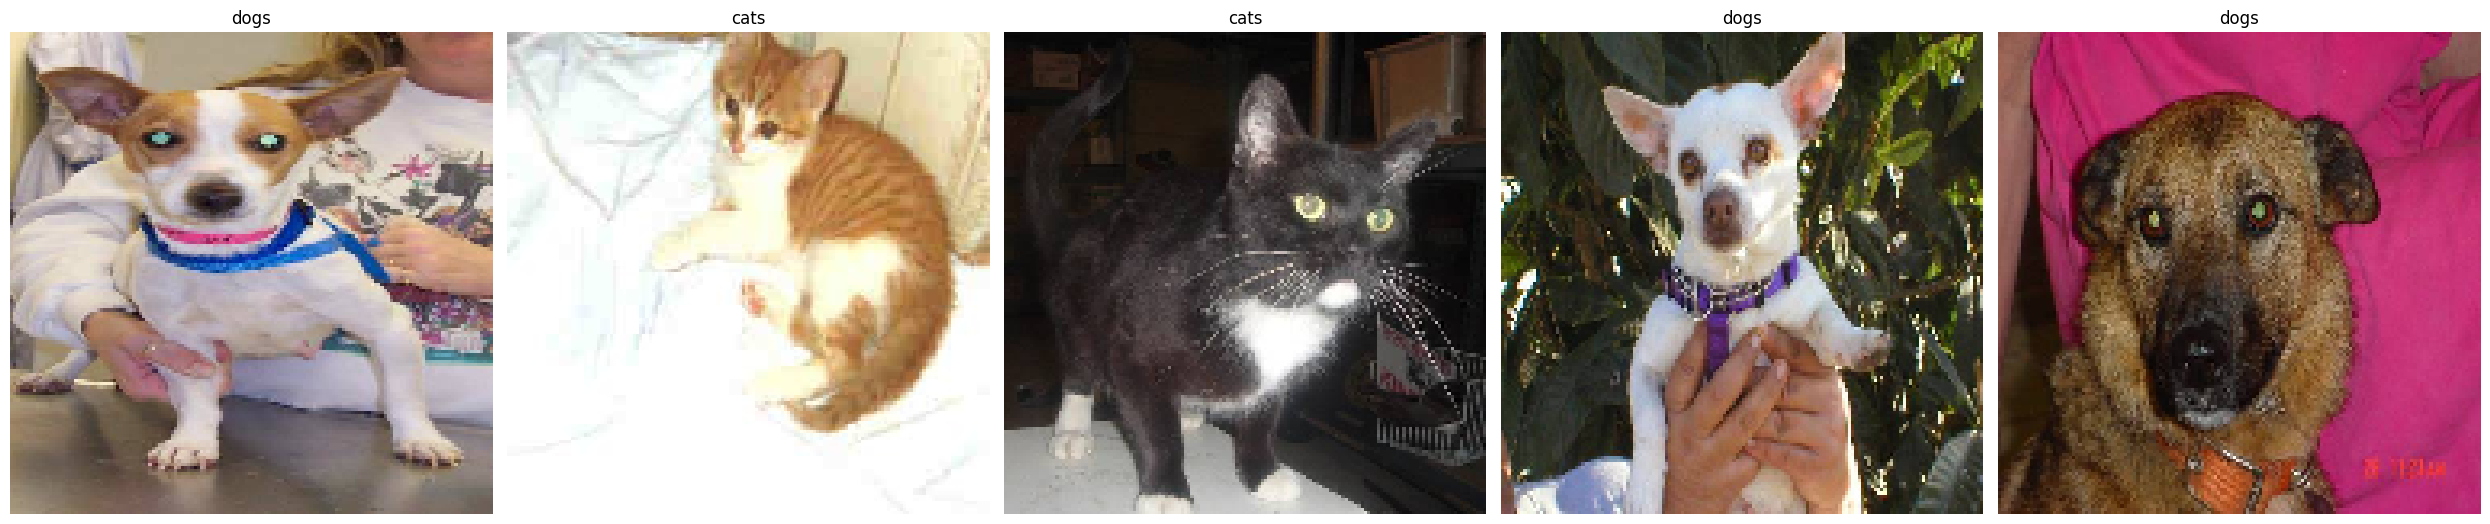

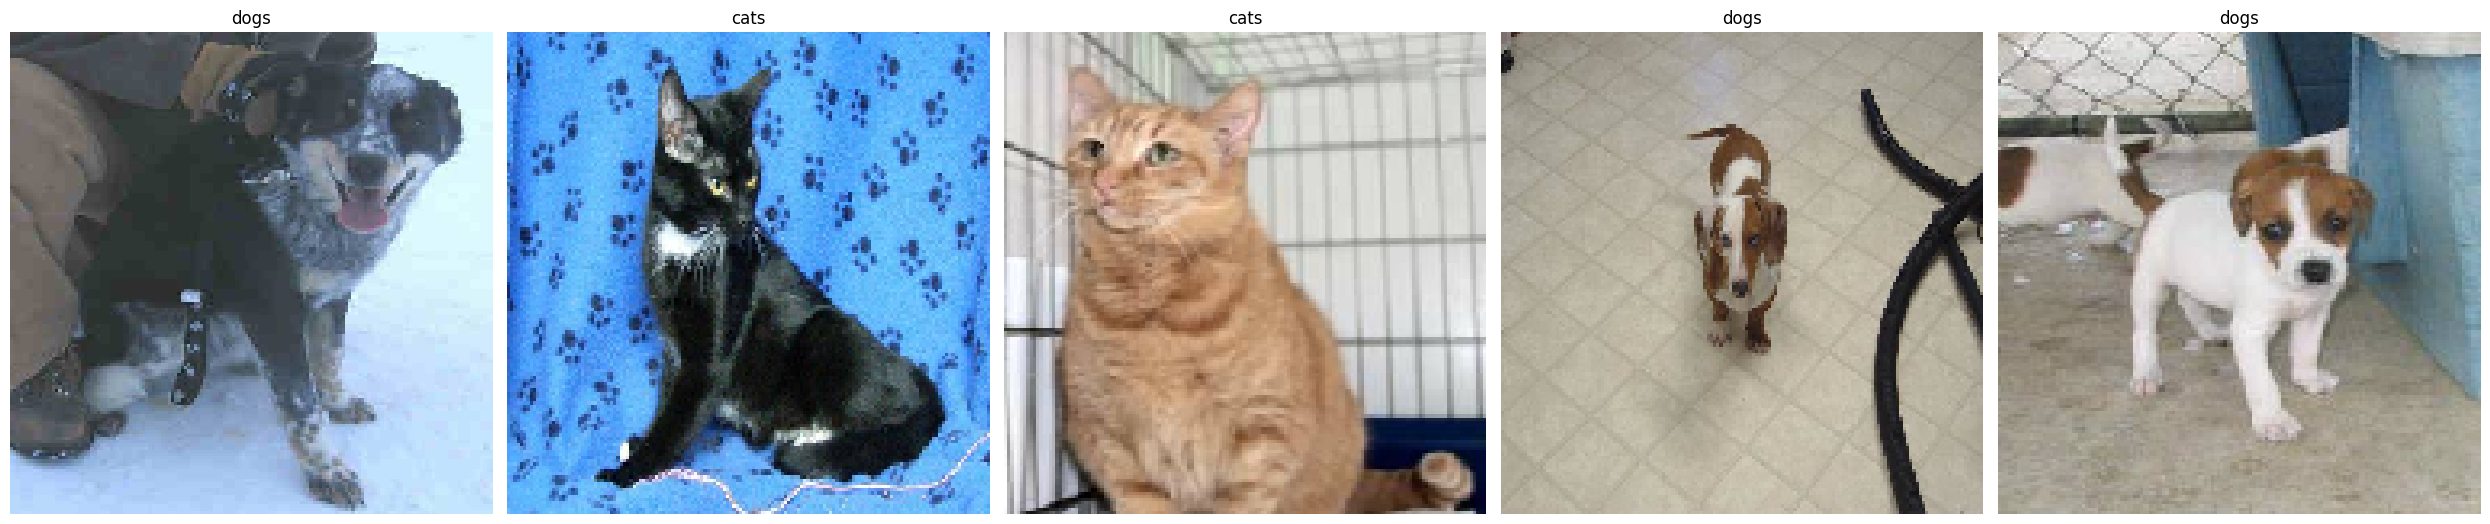

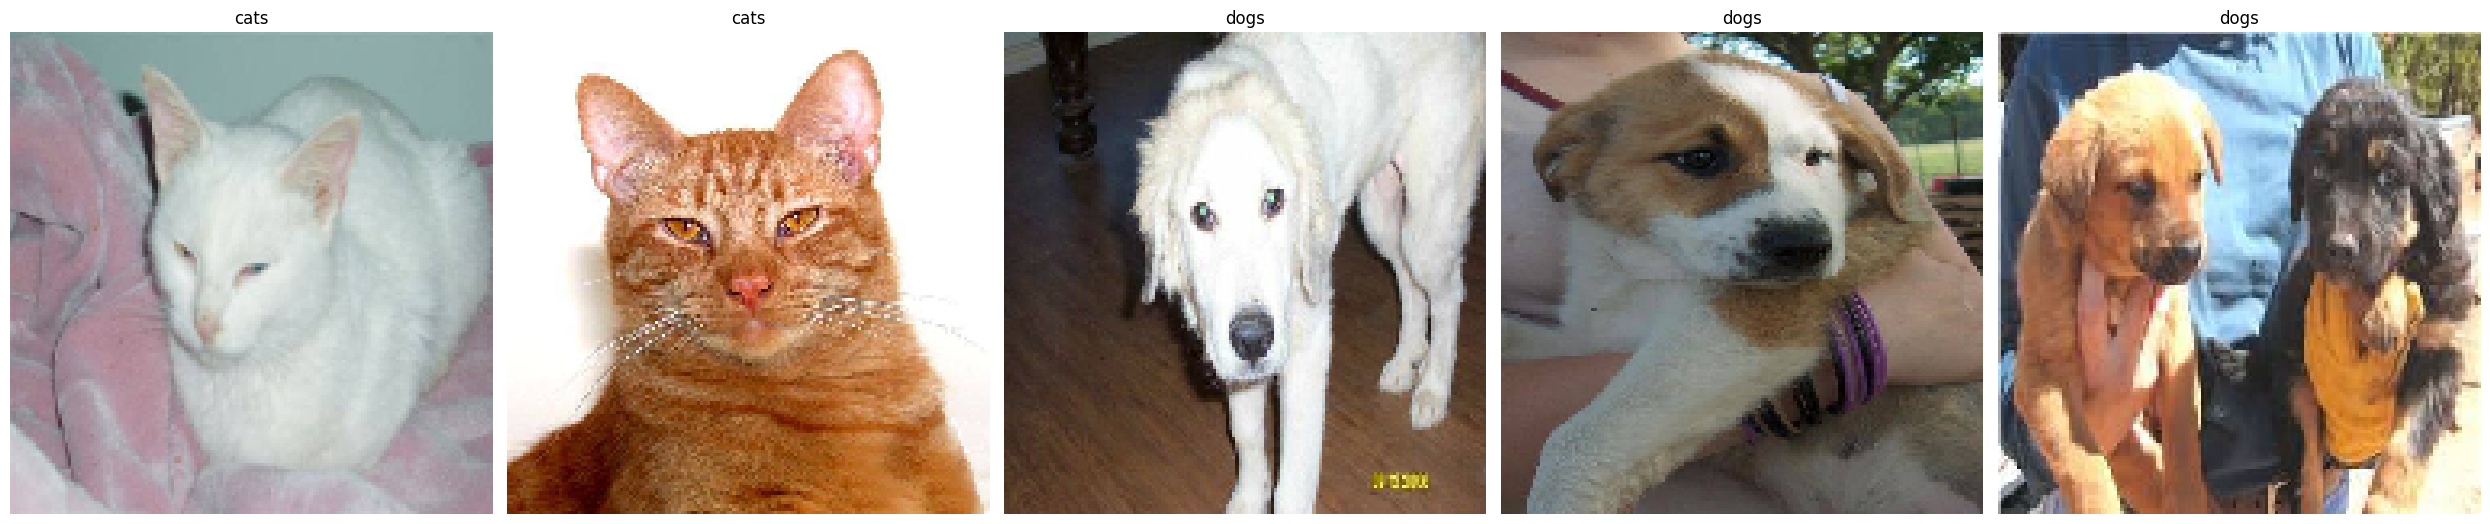

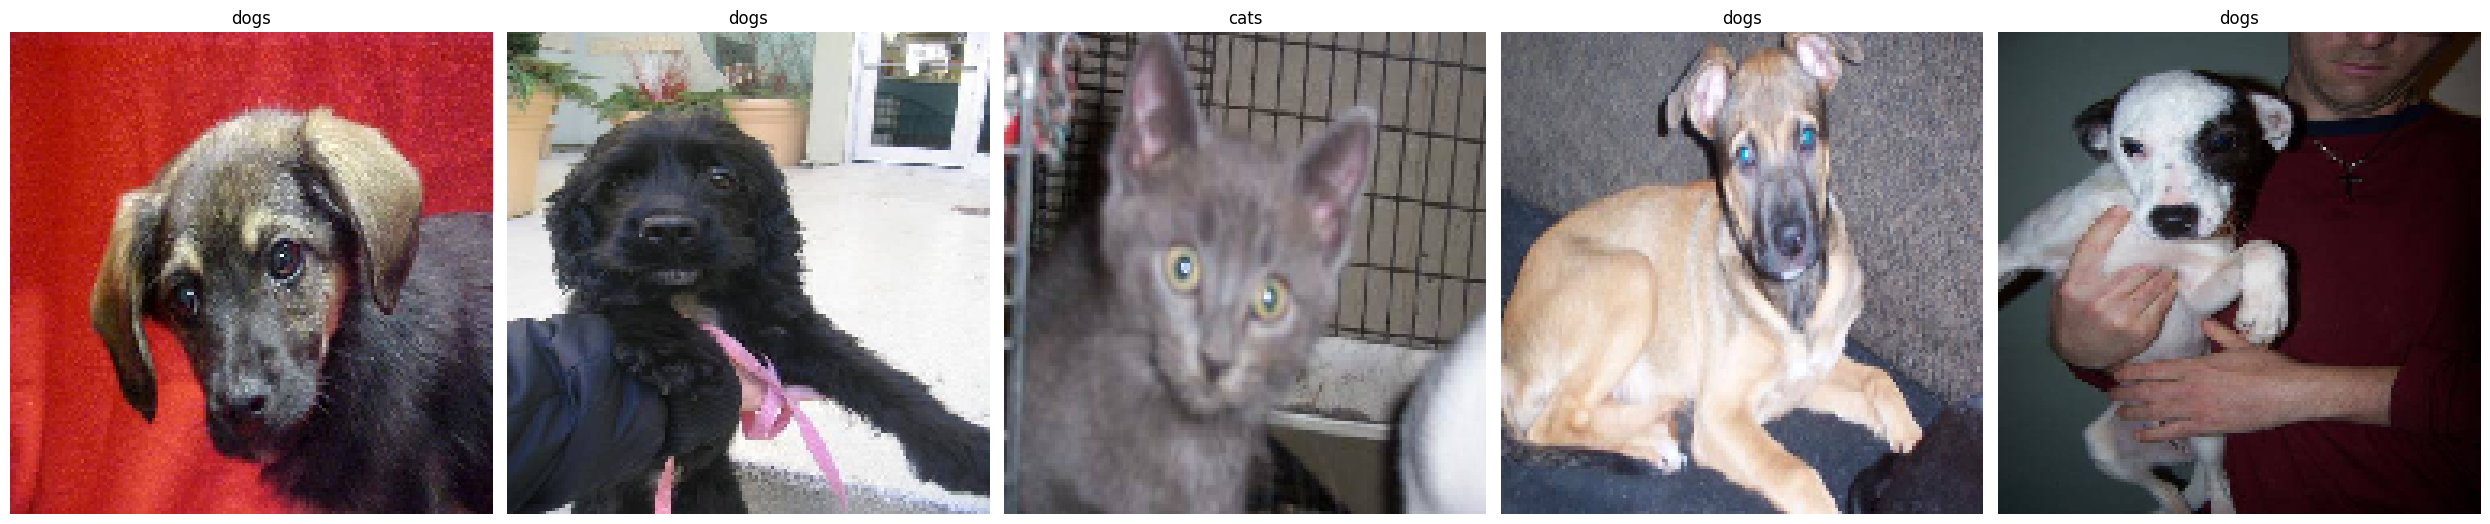

In [ ]:
show_batch(validation_generator[0]) # рисуем батч

In [ ]:
datagen = ImageDataGenerator(
 rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 fill_mode='nearest')

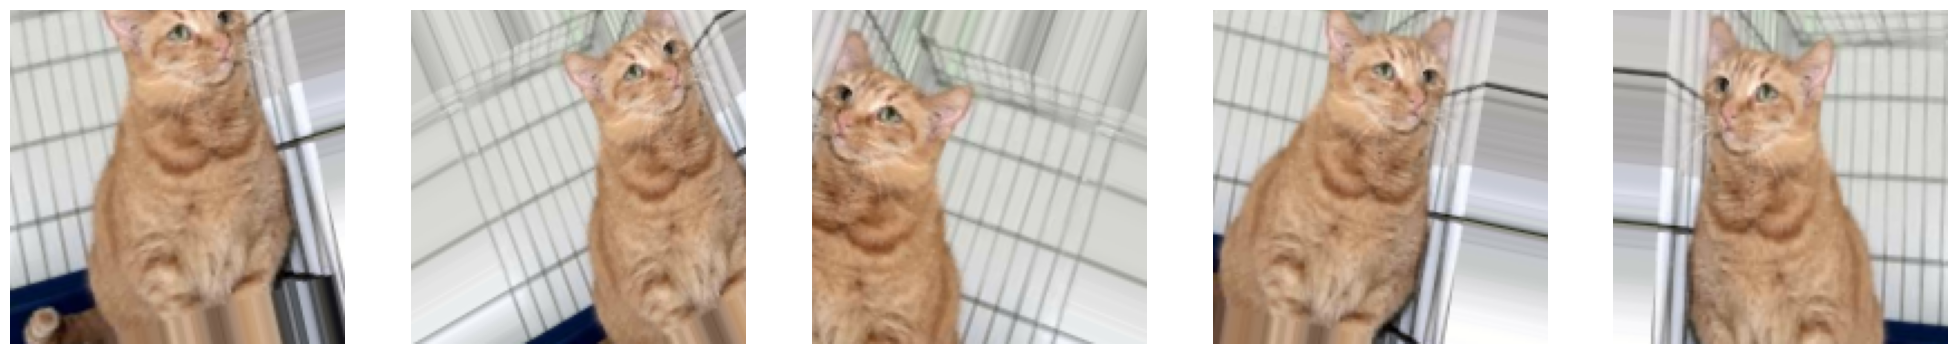

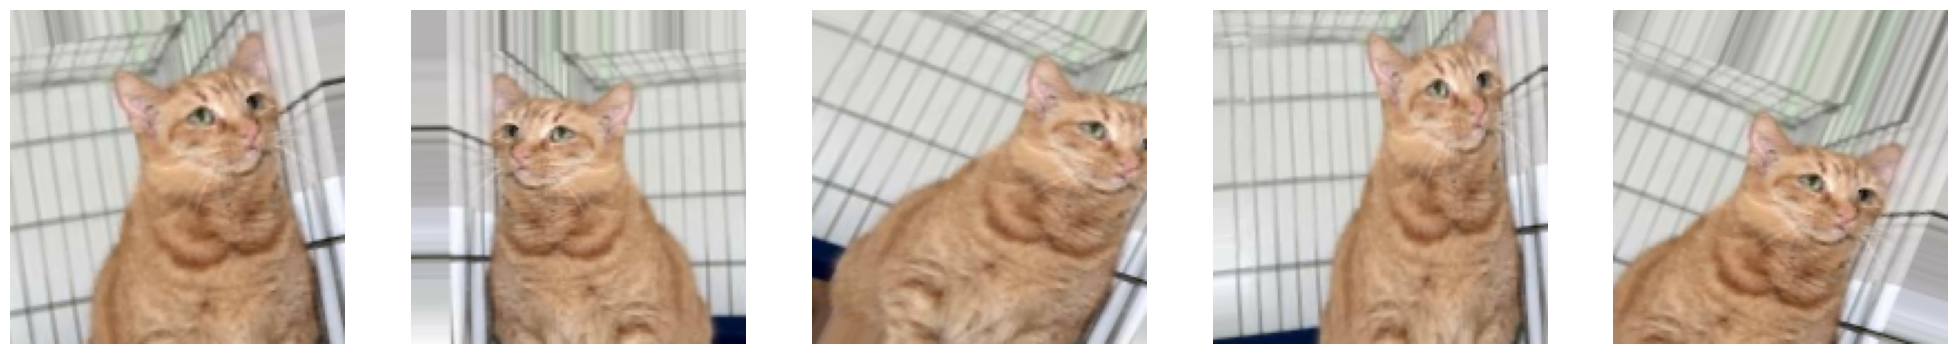

In [ ]:
from keras.preprocessing import image # для работы с изображениями

img = validation_generator[0][0][7]   # выводим случайную картинку с помощью генератора (первый индекс - картинка или метка, второй - номер пакета, третий - номер изображения в пакете)
x = image.img_to_array(img)           # преобразования изображений в матрицу NumPy
x = x.reshape((1,) + x.shape)         # изменяем форму картинки, так как flow работет с массивами изображений, то указываем, что картинка будет одна
columns = 5                           # в сколько колонок выводить данные

i = 0
for batch in datagen.flow(x, batch_size=1):  # запускаем генерацию их массива изображений, пока не встретиться в цикле break
    ix = i % columns # Отображаем по 5 (или другое число, заданное columns) в строку
    # Остаток от деления на 5 равный нулю говорит, что пора перейти на следующую строку (новый график)
    if ix == 0:
        fig, ax = plt.subplots(1, columns, figsize=(25, 8)) # Область построения графика: одна строка в 5 колонок

    ax[ix].imshow(image.array_to_img(batch[0])) # Отображаем изображение животного на графике
    ax[ix].axis('off') # Отключаем отображение осей на графике

    i += 1
    if i % 10 == 0: # если сгенерировали 10 картинок, то можно прервать генерацию
        break
plt.show()

In [ ]:
BATCH_SIZE = 24

# генератор для обучающей выборки
train_datagen = ImageDataGenerator(
    rescale=1./255,           # нормализация данных
    rotation_range=40,        # поворот 40 градусов
    width_shift_range=0.2,    # смещенние изображения по горизонтали
    height_shift_range=0.2,   # смещенние изображения по вертикали
    shear_range=0.2,          # случайный сдвиг
    zoom_range=0.2,           # случайное масштабирование
    horizontal_flip=True,     # отражение по горизонтали
)

# генератор для проверочной выборки
test_datagen = ImageDataGenerator(rescale=1./255)

# генерация картинок из папки для обучающей выборки
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# генерация картинок из папки для проверочной выборки
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 6000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
from keras import optimizers

# Оптимизатор можно задавать по имени с параметрами по умолчанию,
# а можно как метод с заданием значений параметров
# Описание параметров RMSprop - https://keras.io/api/optimizers/rmsprop/
model.compile(loss='binary_crossentropy',
 optimizer=optimizers.RMSprop(learning_rate=1e-4),
 metrics=['acc'])

In [ ]:
# обучаем модель
history = model.fit(
    train_generator,
    steps_per_epoch=2000 // BATCH_SIZE,   # число шагов вычисляем как число образцов на размер пакета
    epochs=30,
    validation_data=validation_generator, # число шагов вычисляем как число образцов на размер пакета
    validation_steps=800 // BATCH_SIZE
)

Epoch 1/30
83/83 [==============================] - 20s 215ms/step - loss: 0.9121 - acc: 0.6586 - val_loss: 0.2945 - val_acc: 0.9104
Epoch 2/30
83/83 [==============================] - 16s 194ms/step - loss: 0.4333 - acc: 0.8203 - val_loss: 0.1744 - val_acc: 0.9508
Epoch 3/30
83/83 [==============================] - 16s 199ms/step - loss: 0.3355 - acc: 0.8604 - val_loss: 0.1572 - val_acc: 0.9381
Epoch 4/30
83/83 [==============================] - 16s 198ms/step - loss: 0.2821 - acc: 0.8956 - val_loss: 0.1264 - val_acc: 0.9533
Epoch 5/30
83/83 [==============================] - 15s 182ms/step - loss: 0.2565 - acc: 0.9006 - val_loss: 0.1178 - val_acc: 0.9508
Epoch 6/30
83/83 [==============================] - 16s 197ms/step - loss: 0.2413 - acc: 0.8991 - val_loss: 0.1159 - val_acc: 0.9508
Epoch 7/30
83/83 [==============================] - 15s 183ms/step - loss: 0.2225 - acc: 0.9101 - val_loss: 0.1116 - val_acc: 0.9545
Epoch 8/30
83/83 [==============================] - 16s 198ms/step - 

In [ ]:
import matplotlib.pyplot as plt

# Рисуем графики
def show_history(store):
    acc = store.history['acc']
    val_acc = store.history['val_acc']
    loss = store.history['loss']
    val_loss = store.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'r', label='Точность на обучающей выборке')
    plt.plot(epochs, val_acc, 'bo', label='Точность на проверочной выборке')
    plt.title('График точности на проверочной и обучающей выборках')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'r', label='Потери на обучающей выборке')
    plt.plot(epochs, val_loss, 'bo', label='Потери на проверочной выборке')
    plt.title('График потерь на проверочной и обучающей выборках')
    plt.legend()
    plt.show()

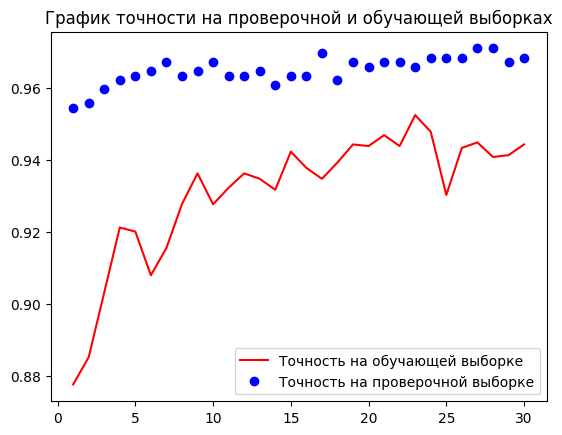

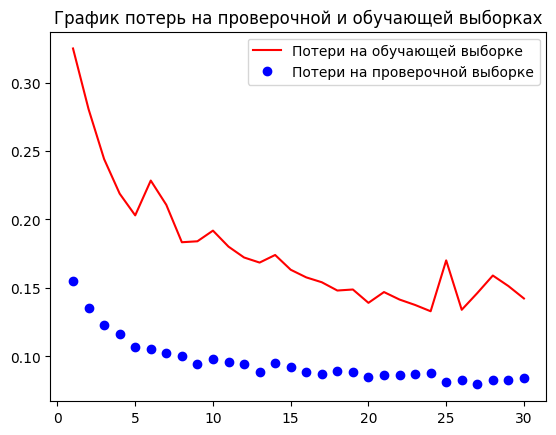

In [ ]:
show_history(history)

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('Точность на контрольной выборке:', test_acc)

Found 2000 images belonging to 2 classes.
50/50 [==============================] - 4s 76ms/step - loss: 0.0801 - acc: 0.9700
Точность на контрольной выборке: 0.9700000286102295


In [ ]:
model.save('cats_and_dogs_version_1')